# Homework Directions for Machine Learning Supervised Linear Regression


# Discovering and Learning with Big Data/ Machine Learning

# Machine Learning main two types:


Supervised leraning: Supervised learning involves modeling the relationship between measured features of data and some label
    associated with the dat. Once this model is determined, it ac be used to apply lable to new, unknown data, This is further
    subdividend into classification tasks and regression tasks. 
    
Unsupervised Learning: Unsupervised learning involves modeling the features of the dataset without refreance to any label, and
    is often described as "letting the data set speak of itself". Theses models include task such as clustering and 
    dimensionality reduction.  
    
Linear Regression: Linear regression is supervised learning algorithm used for predicting a quantitative responce: it's usefull
   relationship between the input variable and the output varibale 
    
Algorithm, Train Model, Training Data, Dataset, Data Cleaning, Split, Score Model Evaluate Model 

    

In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix


from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt

In [32]:
# Load the data set into a pandas dataframe
# Read the Iris data set and create the dataframe df

df = pd.read_csv ("BostonHousing.csv")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [33]:
# give names to the columns

col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV']

In [35]:
# Let's check to see if the column names were added

df.columns = col_names

In [36]:
#  Look at the first 5 rows of data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


# Preprocess the Dataset

Clean the data and Missing Values 

In [37]:
# We Can see there are no missing data points. 
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
AA         0
LSTAT      0
MEDV       0
dtype: int64

# Performing the Exploratory Data Analysis (EDA)


In [38]:
# Get the number of records/Rows and the number of variable / Columns

df.shape 

(506, 14)

In [39]:
# Get all data types of the variables.
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
AA         float64
LSTAT      float64
MEDV         int64
dtype: object

In [40]:
# Obtain the mummary statistics of the data 
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


# Creating Histogram 

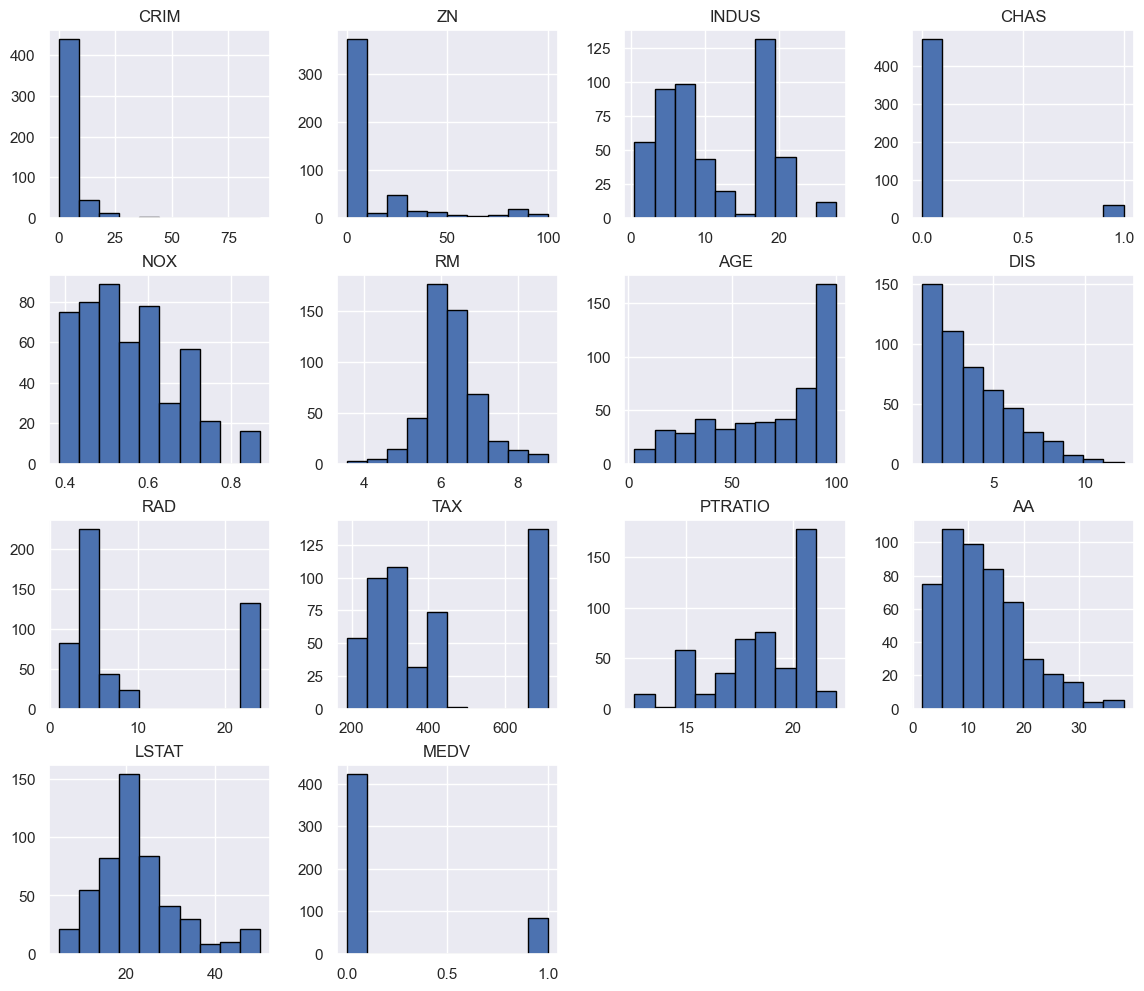

In [41]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.

df.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

# Creating a Density Plots

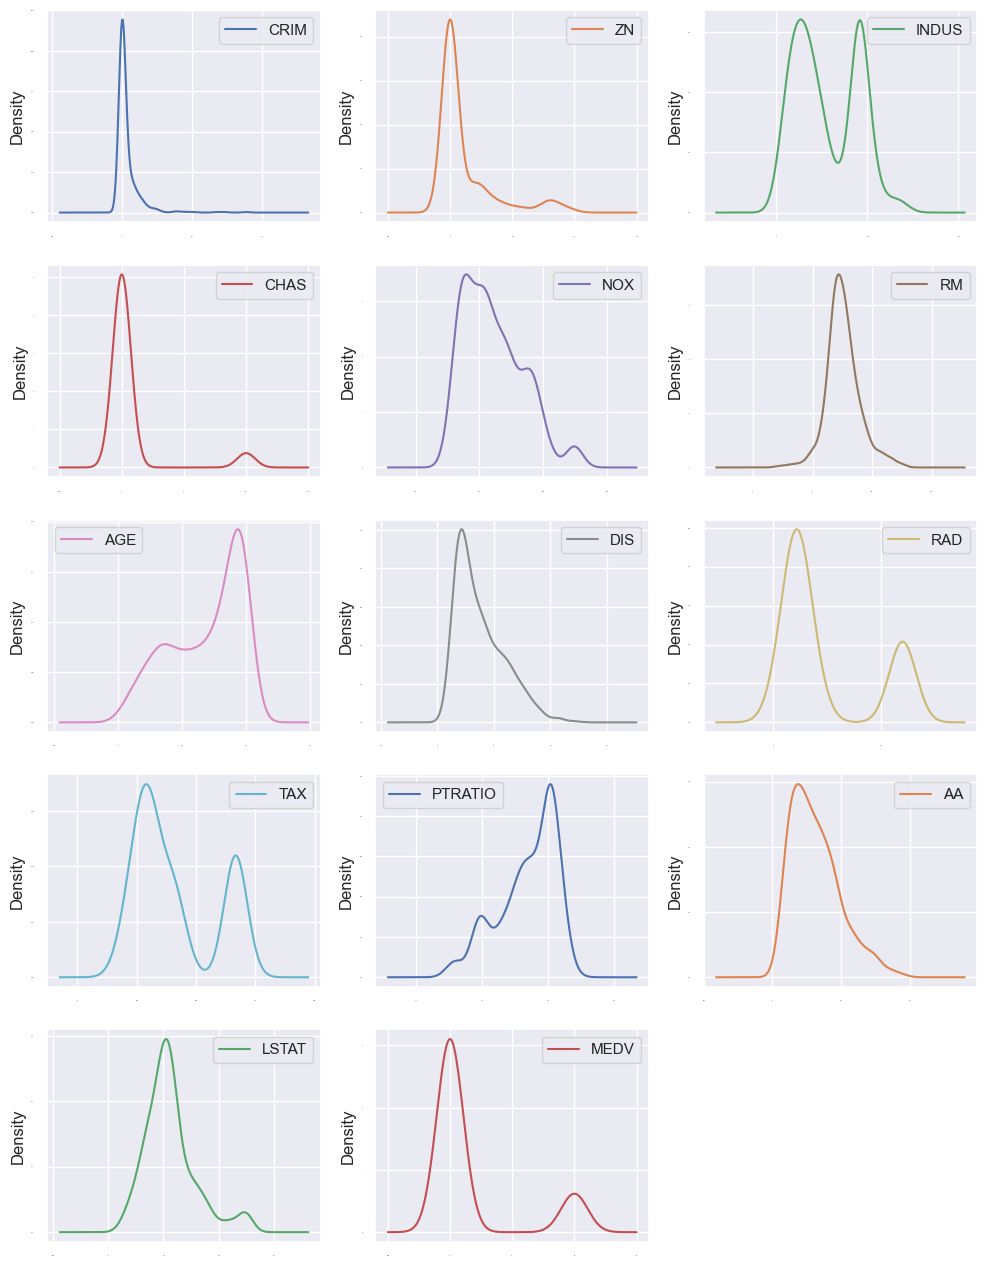

In [42]:
# Density plots
# Notes:  14 numeric variable, at least 14 plots, layout (5,3): 5 rows, each row with 3 plots
# When subplots have a shared x-axis along a column, only the x tick labels of the bottom subplot are created

df.plot(kind='density', subplots=True, layout= (5,3), sharex=False, legend=True, fontsize=1, figsize= (12,16))
plt.show()

# Creating a Box Plots 

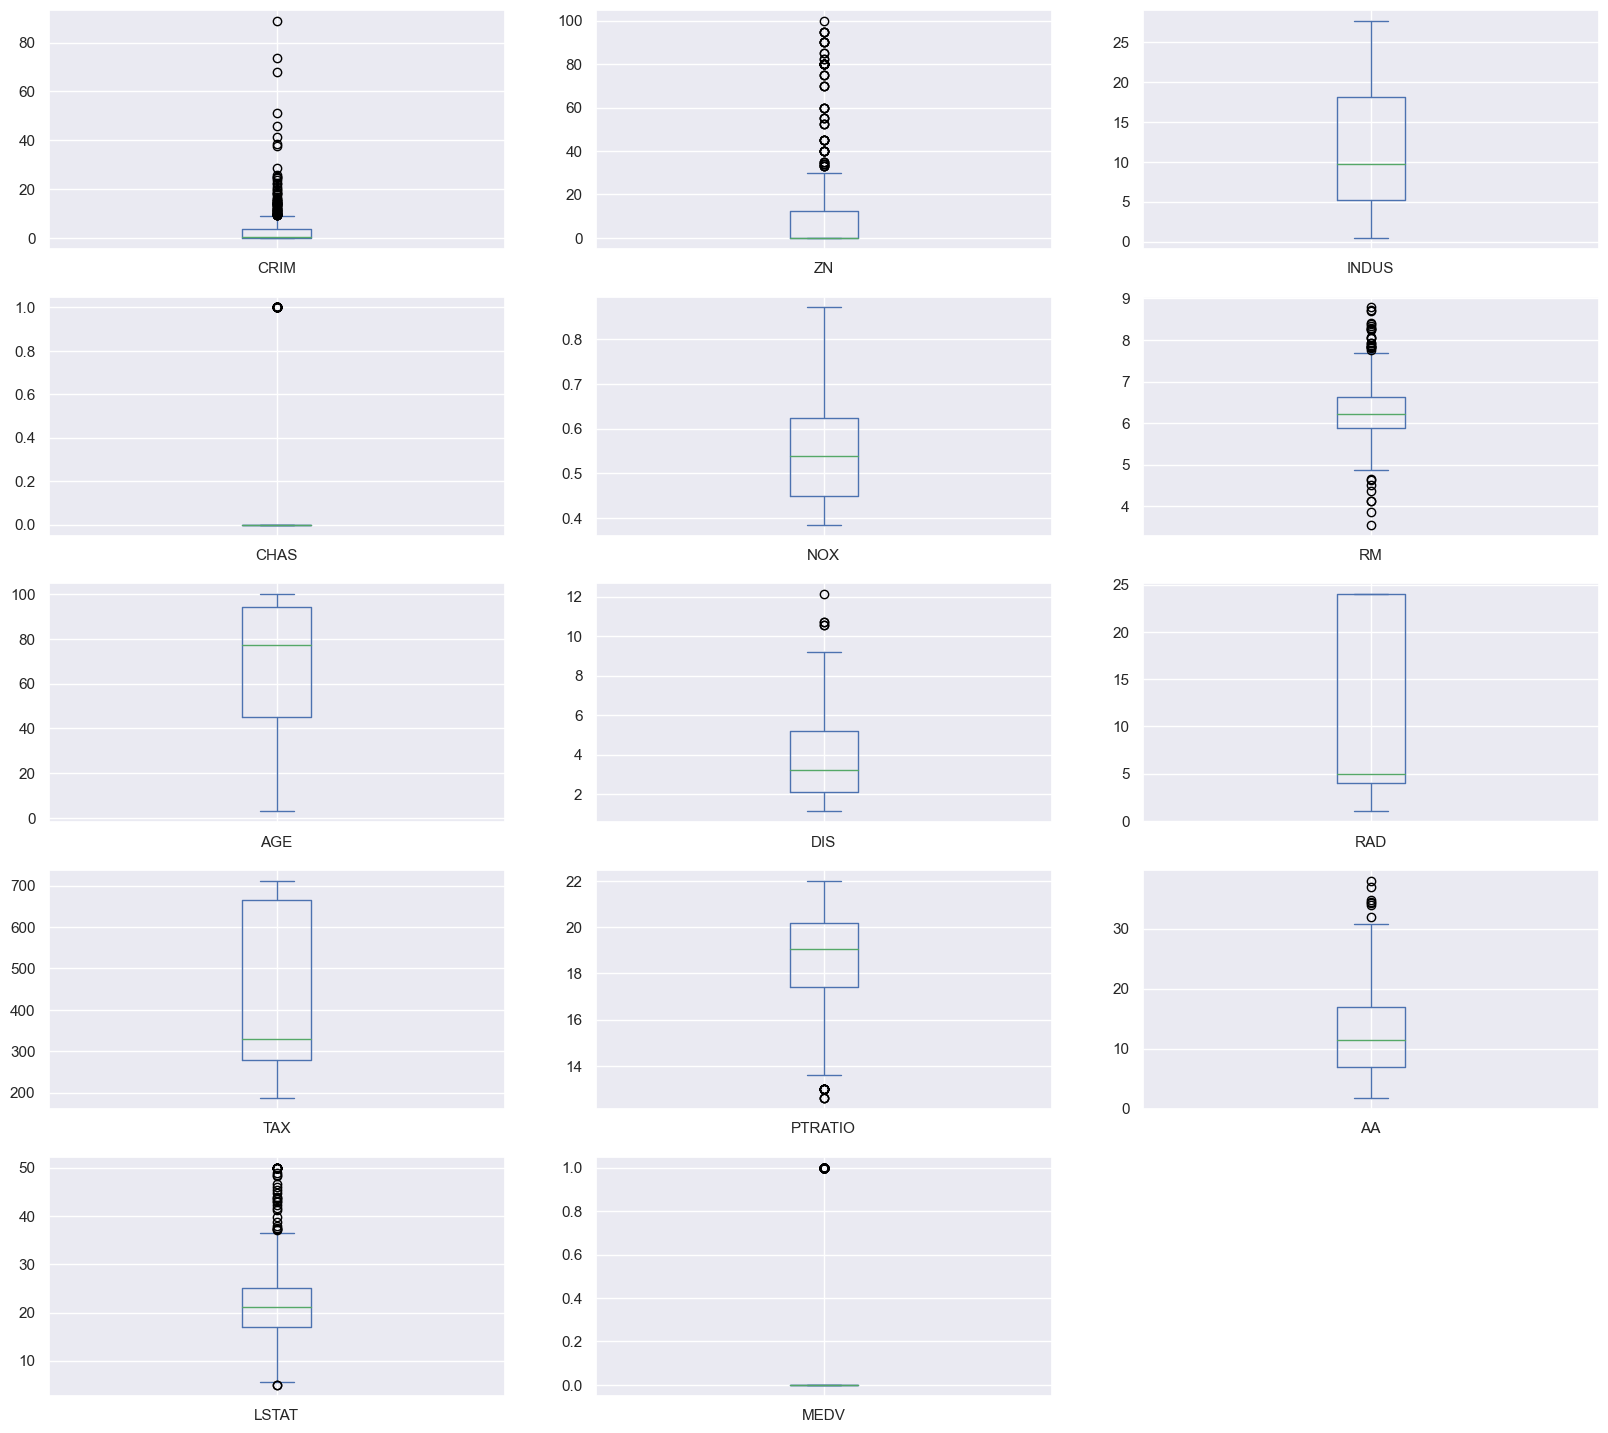

In [43]:
# Boxplots

df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

# Correlation Analysis and Feature Selection

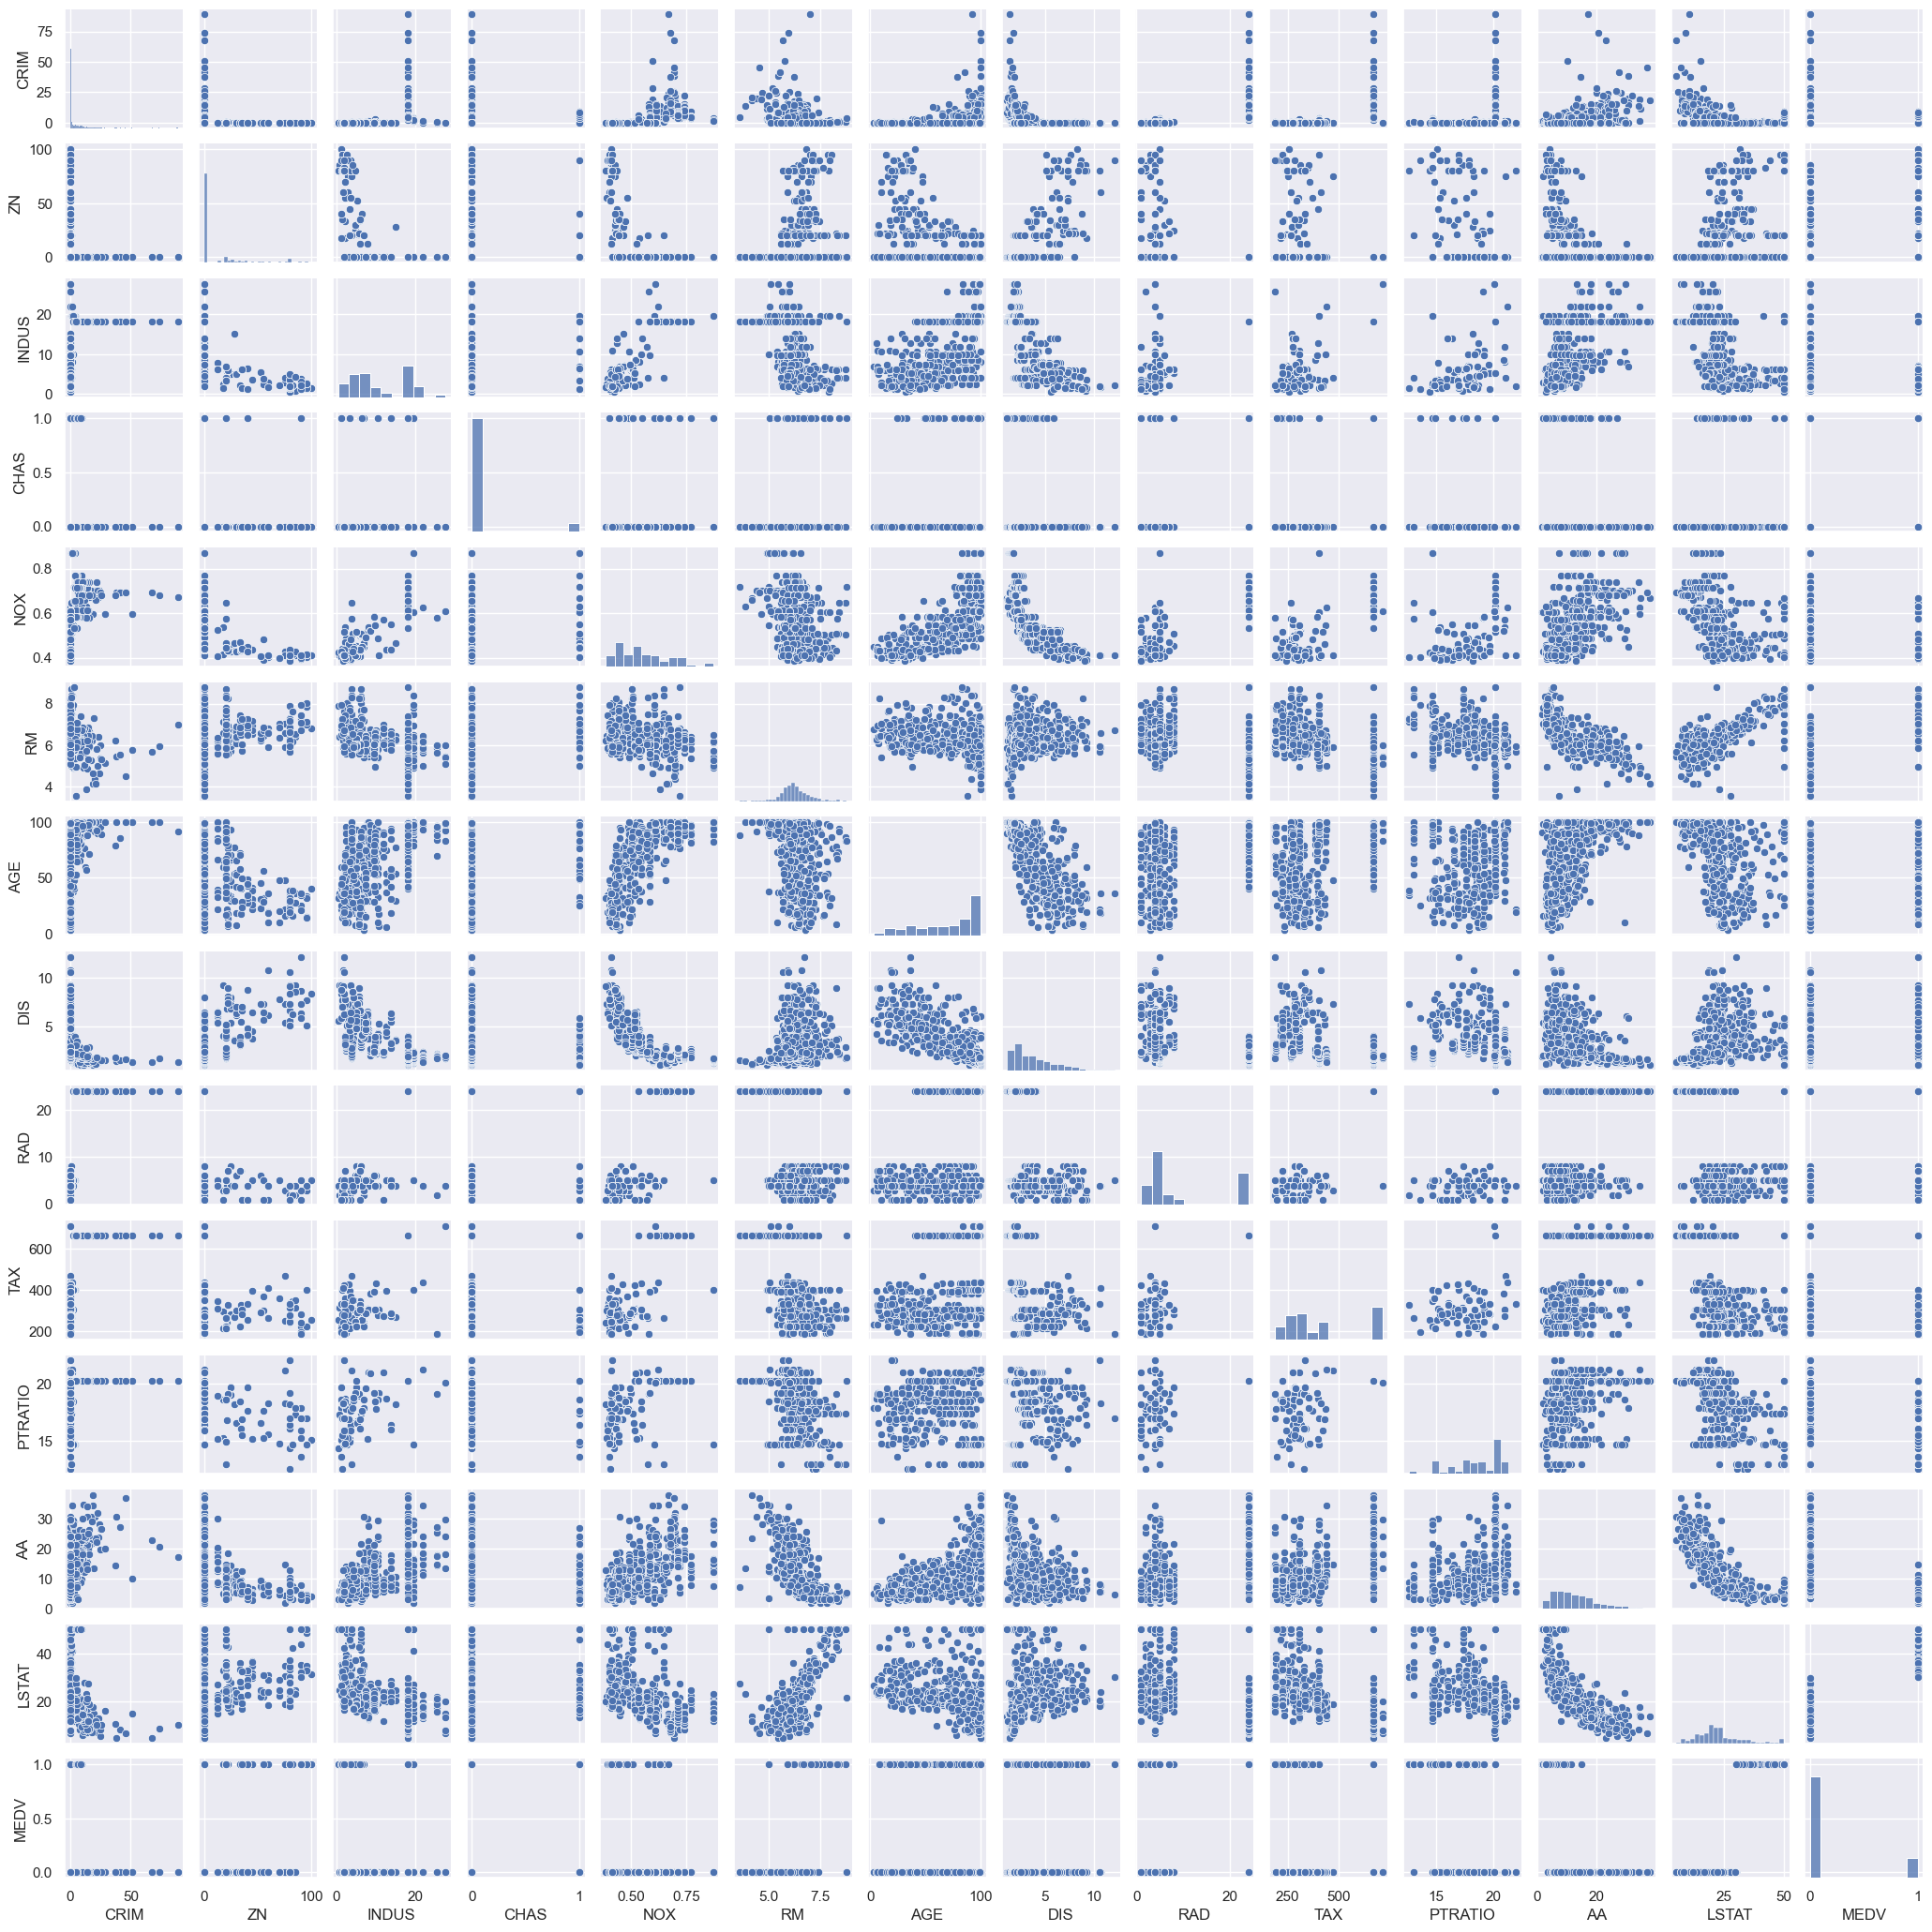

In [44]:
# Obtain pair plots of the data.  
# I know this is a lot of information but I wanted you to see what is possible with Seaborn library.

sns.pairplot(df, height=1.5);
plt.show()

# Correlations

In [45]:
# We will decrease the number of decimal places with the format function.

pd.options.display.float_format = '{:,.3f}'.format

In [46]:
# Here we will get the correlations, with only 3 decimals.

df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,0.456,-0.388,-0.152
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,-0.413,0.360,0.365
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,0.604,-0.484,-0.366
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,-0.054,0.175,0.109
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,0.591,-0.427,-0.233
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,-0.614,0.695,0.641
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,0.602,-0.377,-0.191
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,-0.497,0.250,0.119
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,0.489,-0.382,-0.198
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,0.544,-0.469,-0.274


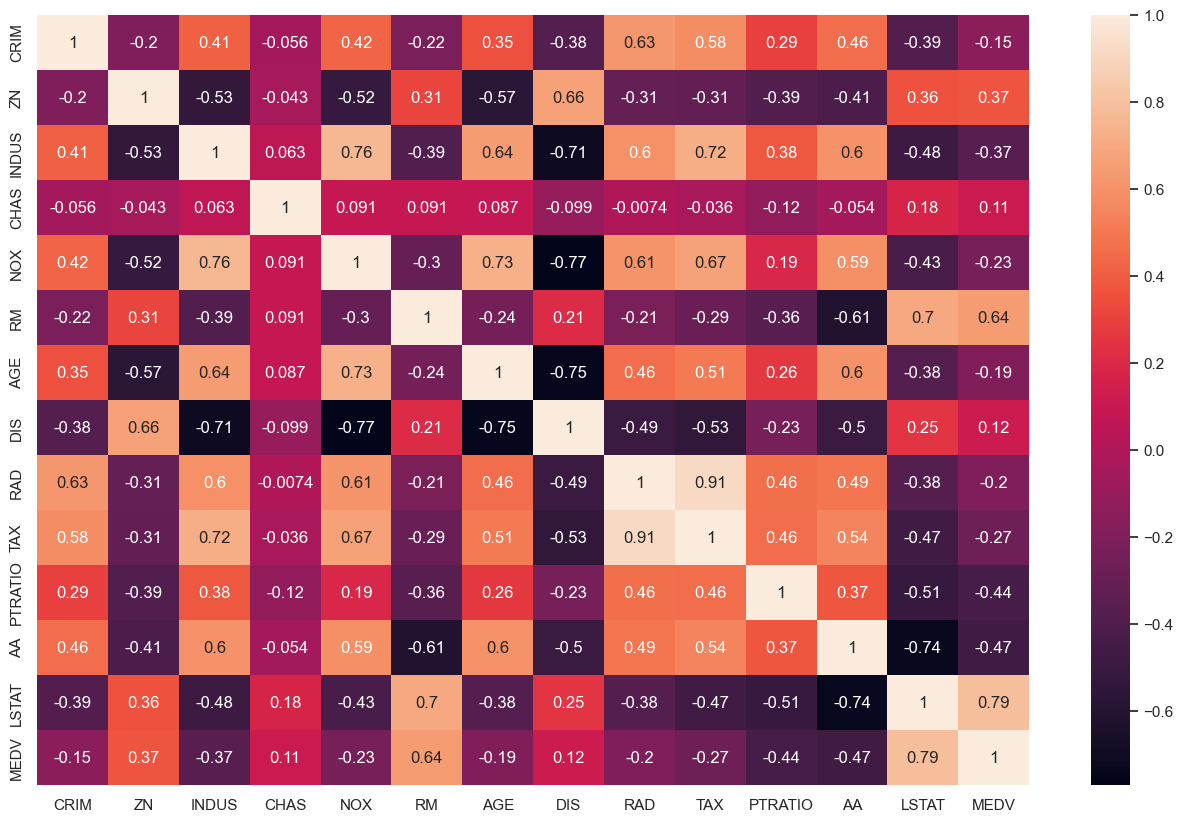

In [47]:
# We could simply look at the correlations but a heatmap is a great way to present to the general audience.

plt.figure(figsize =(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [49]:
# If you get stuck on what can be done with the heatmap, you can use the following code to get help

sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

In [50]:
# Now let's say we want to decrease the amount of variables in our heatmap.  
# We would use the following code.  This will be on the final!
#  Remember how to make a subset.  Try using different variables.

df2= df[['CRIM','INDUS', 'TAX','MEDV']]

In [51]:
# Here we will look at the correlations for only the variables in df2.

df2.corr()

,CRIM,INDUS,TAX,MEDV
CRIM,1.000,0.407,0.583,-0.152
INDUS,0.407,1.000,0.721,-0.366
TAX,0.583,0.721,1.000,-0.274
MEDV,-0.152,-0.366,-0.274,1.000


# Creating a Pait Plot

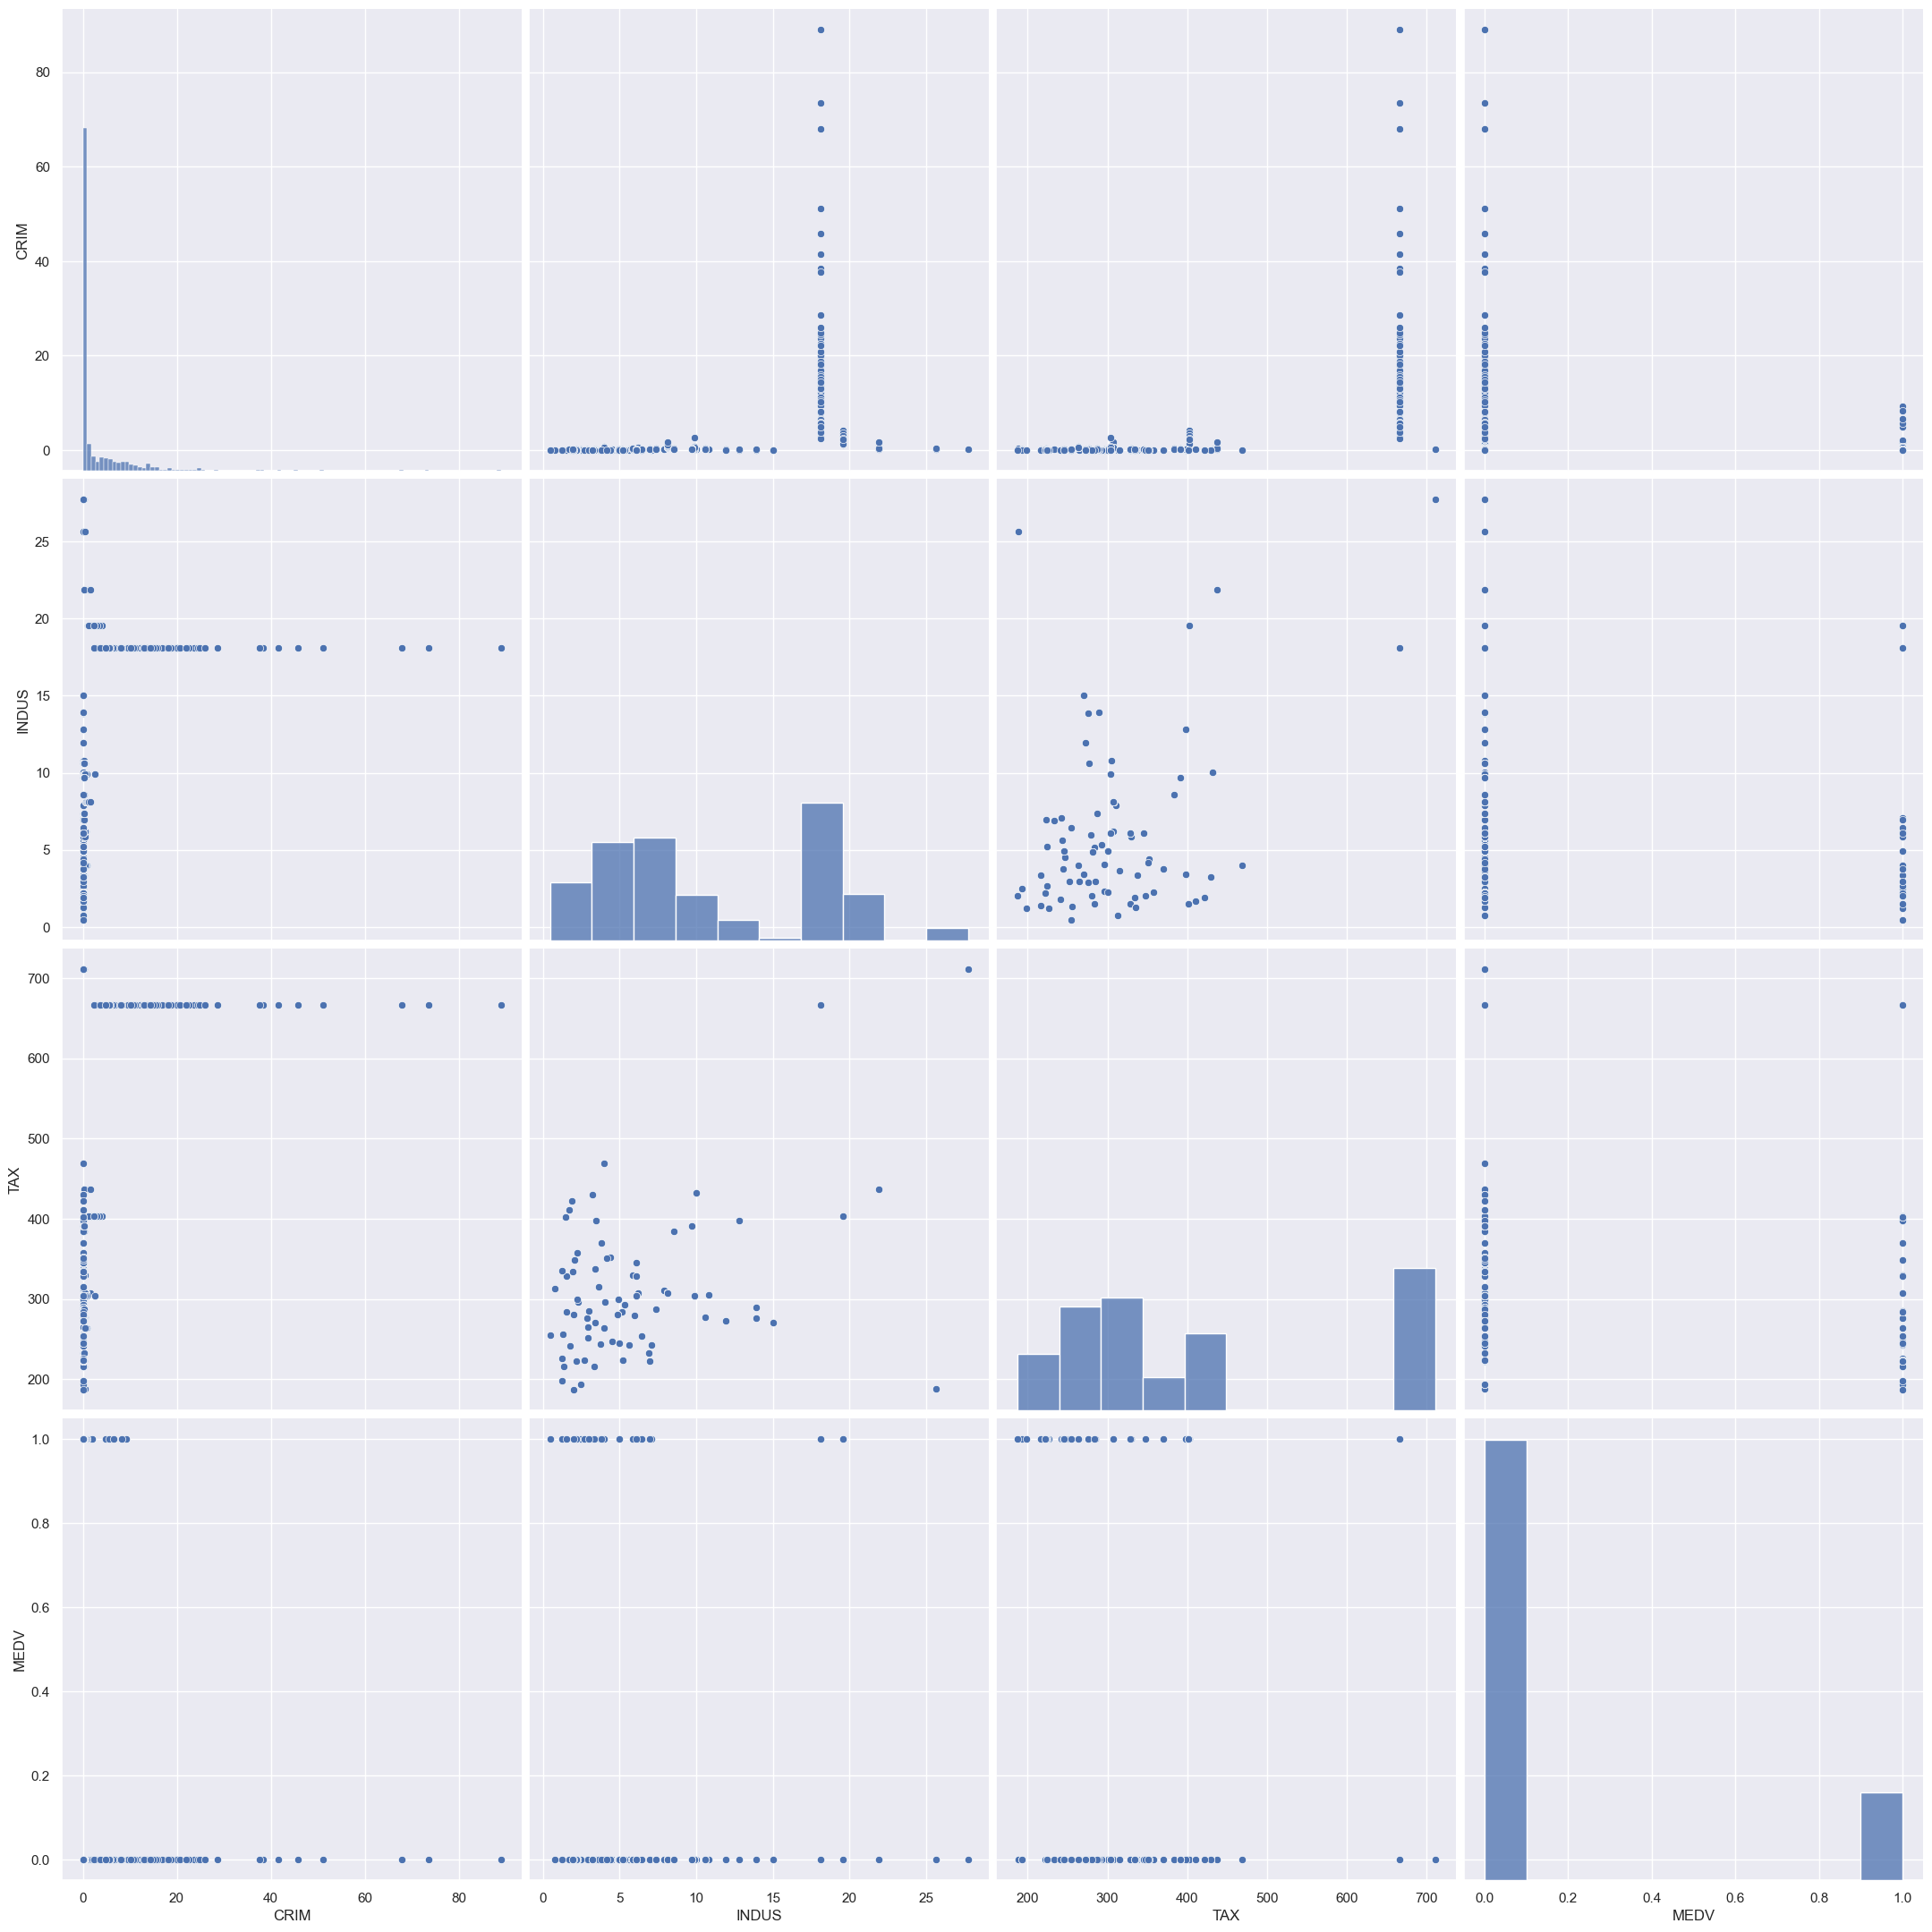

In [52]:
# Let's try the pairplot with only the variables in df2

sns.pairplot(df2, height=5.5);
plt.show()

# Creating a Heat Map 

<Figure size 2000x1200 with 0 Axes>

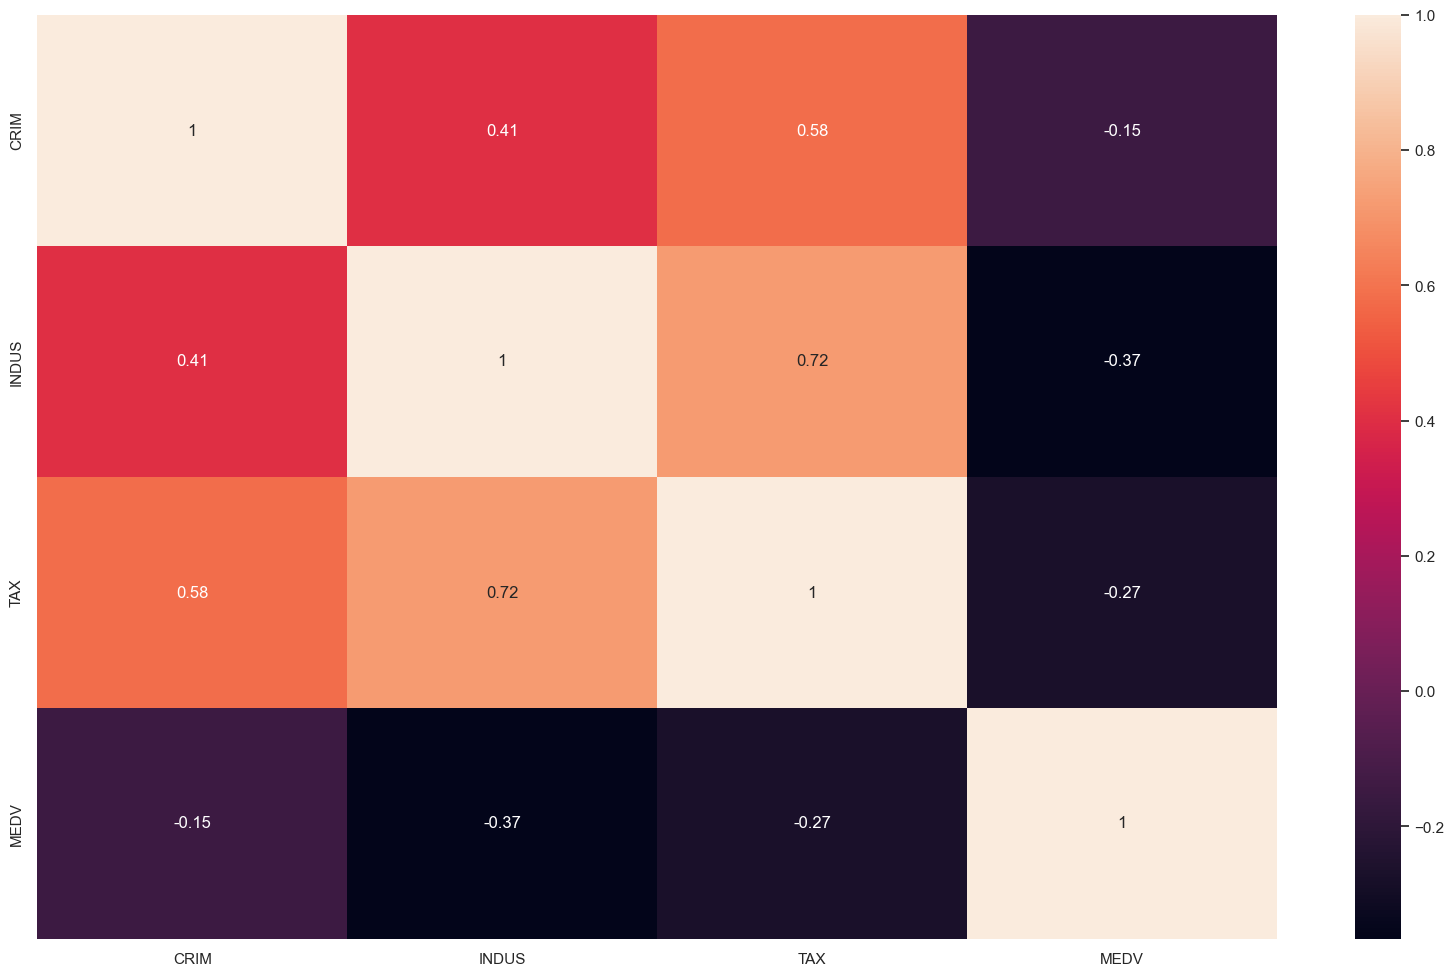

In [53]:
# Now we will make a heatmap with only the variables in df2 subset.  
# Again, it is very important to understand this for the final.

plt.figure(figsize =(20,12))
plt.figure(figsize = (20,12))
sns.heatmap(df2.corr(), annot=True)
plt.show()

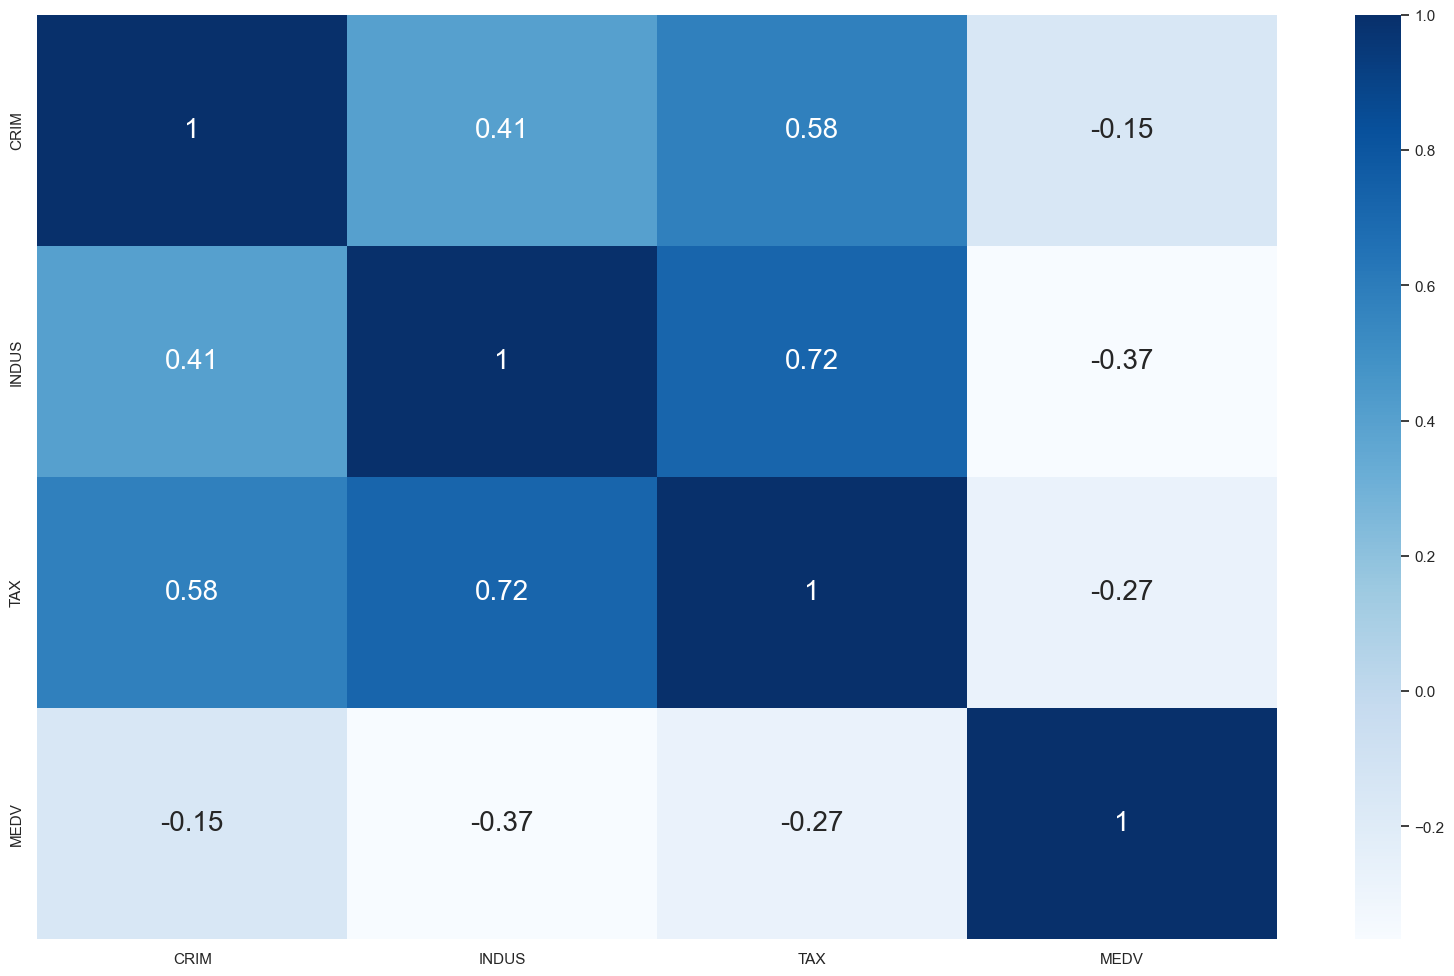

In [54]:
# If you want to change the color and font, to make the labels easier to read, use this code.

plt.figure(figsize =(20,12))
sns.heatmap(df2.corr(), cmap="Blues", annot=True, annot_kws={"fontsize":20})
plt.show()

# Separate the dataset into input and output Numpay Arrays 

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# Store the dataframe values into a numPy array

array= df2.values

# Separate the array into input and output components by slicing (you used this in your homework)
# For X (input) [:,3] --> All the rows and columns from 0 up to 3

X = array [:, 0:3]

# For Y (output) [:3] --> All the rows in the last column (MEDV)

Y = array [:,3]

# Spilt into input/Output Array into Training/ Teasting Datasets 

In [58]:
# Split the dataset --> training sub-dataset:  67%, and test sub-dataset:  33%

test_size = 0.33

# Selection of records to include in which sub-dataset must be done randomly - use the for seed radomization

seed = 7

# Split the dataset (both input & output) into training/testing datasets
# if random_state = None : Calling the function multiple times will produce different results.
# if random_state = Integer : Will produce the same results across different calls

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

# Build and Train the Model 

In [59]:
# Build the model

model=LinearRegression()

# Train the model using the training sub-dataset

model.fit(X_train, Y_train)

#Print out the coefficients and the intercept
# Print intercept and coefficients
# are the variables statistically significant
# interdept = mean (average) value of Y
# if the value is less than 0.05: there is a strong relationship between the variable and the target  

print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: 0.4202421479686478
Coefficients: [ 0.00052558 -0.01816927 -0.0001247 ]


In [60]:
# If we want to print out the list of the coefficients with their correspondent variable name
# Pair the feature names with the coefficients

names_2 = ["CRIM", "INDUS", "TAX"]

coeffs_zip = zip(names_2, model.coef_)

# Convert iterator into set

coeffs = set(coeffs_zip)

# Print (coeffs)

for coef in coeffs:
    print (coef, "\n")

('CRIM', 0.0005255772786145237) 

('TAX', -0.00012470050018906857) 

('INDUS', -0.018169268043512397) 



In [61]:
# Train Model 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

LinearRegression(n_jobs=1)

# Calculate R-Squared

Notes: The higher the R-squared, the better (0 – 100%). Depending on the model, the best models score above 83%. The R-squared value tells us how well the independent variables predict the dependent variable. This is very low. Think about how you could increase the R-squared. What variables would you use? This will be important for the final.
Prediction

In [62]:
R_squared = model.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  0.10641282207563107


In [63]:
model.predict([[12,10,450]])

array([0.18874117])

# We have now trained the model. Let’s use the trained model to predict the  “Median value of owner-occupied homes in 1000 dollars” (MEDV).

# We are using the following predictors:
    
CRIM: per capita crime rate by town: 12

INDUS: proportion of non-retail business acres per town: 10

TAX: full-value property-tax rate per $10,000: 450
        
Notes: So, the model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $24,144.
Evaluate/Validate Algorithm/Model, Using K-Fold Cross-Validation

In [64]:
# Evaluate the algorithm
# Specify the K-size

num_folds = 10

# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated

seed = 7

# Split the whole data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm

scoring = 'neg_mean_squared_error'

# Train the model and run K-foLd cross-validation to validate/evaluate the model

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -0.120733509351138


Notes: After we train, we evaluate. We are using K-fold to determine if the model is acceptable. We pass the whole set since the system will divide it for us. We see there is a -64 avg of all errors (mean of square errors). This value would traditionally be a positive value but scikit reports this value as a negative value. If the square root would have been evaluated, the value would have been around 8

# Let's use a different scoring parameter. Here we use the Explained Variance. The best possible score is 1.0, lower values are worse.

In [65]:
# Evaluate the algorithm
# Specify the K-size

num_folds = 10

# Fix the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated

seed = 7

# Split the whole data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use explained variance value to evaluate the model/algorithm

scoring = 'explained_variance'

# Train the model and run K-foLd cross-validation to validate/evaluate the model

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: 0.13106157787624334


In [66]:
# Homework ADTA 5340 Module 5